In [2]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os

import warnings
warnings.filterwarnings("ignore")



In [3]:
# loading the data
data = pd.read_csv('student_data2.csv')
data.head(10)

data.info()


# shape of data( number of rows and columns)
data.shape

# Description of numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               326 non-null    object 
 1   student_id           326 non-null    object 
 2   level                325 non-null    object 
 3   subject              326 non-null    object 
 4   1st_term             326 non-null    int64  
 5   2nd_term             326 non-null    int64  
 6   3rd_term             326 non-null    int64  
 7   avg_total            326 non-null    float64
 8   device_access        326 non-null    object 
 9   tech_club            326 non-null    object 
 10  personal_device      326 non-null    object 
 11  lab_access           326 non-null    object 
 12  school_ict_exposure  326 non-null    object 
 13  location             326 non-null    object 
 14  state_of_ict_lab     326 non-null    object 
dtypes: float64(1), int64(3), object(11)
memo

,1st_term,2nd_term,3rd_term,avg_total
count,326.000000,326.000000,326.000000,326.000000
mean,74.392638,82.843558,81.236196,79.490798
std,19.695040,15.552890,11.484145,11.201179
min,0.000000,0.000000,36.000000,30.000000
25%,70.000000,76.250000,74.250000,73.416667
50%,79.000000,87.000000,83.000000,81.333333
75%,86.000000,94.000000,89.000000,87.583333
max,100.000000,100.000000,100.000000,98.333333


In [4]:
# # rename Columns 'computer_access'
# data.rename(columns={'computer_access': 'device_access'}, inplace=True)

In [5]:
# checking for duplicates
data.duplicated().sum()

np.int64(0)

In [6]:
data.head()

,school,student_id,level,subject,1st_term,2nd_term,3rd_term,avg_total,device_access,tech_club,personal_device,lab_access,school_ict_exposure,location,state_of_ict_lab
0,sch01,sch01-stud01,primary 3,coding,77,79,89,81.666667,yes,not joined,no,high,high,urban,medium
1,sch01,sch01-stud02,primary 3,coding,82,100,78,86.666667,yes,not joined,no,high,high,urban,medium
2,sch01,sch01-stud03,primary 3,coding,85,97,85,89.000000,yes,joined,yes,high,high,urban,medium
3,sch01,sch01-stud04,primary 3,coding,70,90,79,79.666667,yes,not joined,no,high,high,urban,medium
4,sch01,sch01-stud05,primary 3,coding,87,83,69,79.666667,yes,joined,yes,high,high,urban,medium


In [7]:
# check for missing values
data.isnull().sum()

school                 0
student_id             0
level                  1
subject                0
1st_term               0
2nd_term               0
3rd_term               0
avg_total              0
device_access          0
tech_club              0
personal_device        0
lab_access             0
school_ict_exposure    0
location               0
state_of_ict_lab       0
dtype: int64

In [9]:
# Handling missing value by imputing mode
data['level'] = data['level'].fillna(data['level'].mode()[0])

In [10]:

from tabulate import tabulate

categorical_cols = [
    'level', 'subject', 'device_access', 'tech_club', 'personal_device',
    'lab_access', 'school_ict_exposure', 'location', 'state_of_ict_lab'
]

categorical_columns = {}
for col in categorical_cols:
    if col in data.columns:
        # Clean whitespace and count values
        counts = data[col].astype(str).str.strip().value_counts(dropna=False)
        categorical_columns[col] = counts
    else:
        print(f"Warning: Column '{col}' not found in data.")

print("### Categorical Data Summary\n")
for col, summary in categorical_columns.items():
    print(f"#### {col}\n")
    try:
        print(tabulate(summary.reset_index().values, headers=[col, "Count"], tablefmt="github"))
    except Exception:
        print(summary)
    print("\n")

### Categorical Data Summary

#### level

| level     |   Count |
|-----------|---------|
| primary 4 |      58 |
| primary 3 |      56 |
| primary 6 |      42 |
| JS1       |      35 |
| SS1       |      30 |
| JS3       |      25 |
| JS2       |      24 |
| primary 5 |      20 |
| SS2       |      16 |
| primary 2 |      11 |
| primary 1 |       9 |


#### subject

| subject   |   Count |
|-----------|---------|
| ict       |     175 |
| coding    |     151 |


#### device_access

| device_access   |   Count |
|-----------------|---------|
| yes             |     326 |


#### tech_club

| tech_club   |   Count |
|-------------|---------|
| not joined  |     291 |
| joined      |      35 |


#### personal_device

| personal_device   |   Count |
|-------------------|---------|
| no                |     244 |
| yes               |      82 |


#### lab_access

| lab_access   |   Count |
|--------------|---------|
| high         |     151 |
| low          |     130 |
| medium       |     

In [12]:
# Description of categorical columns
data.describe(include = 'object')

,school,student_id,level,subject,device_access,tech_club,personal_device,lab_access,school_ict_exposure,location,state_of_ict_lab
count,326,326,326,326,326,326,326,326,326,326,326
unique,3,326,11,2,1,4,2,3,3,2,2
top,sch01,sch01-stud01,primary 4,ict,yes,not joined,no,high,high,urban,medium
freq,151,1,58,175,326,289,244,151,151,196,196


In [13]:
# Handling inconsistencies in the data( like white space, leading or trailing spaces)
for col in ['level', 'subject', 'device_access', 'tech_club', 'personal_device', 'lab_access', 'school_ict_exposure', 'location', 'state_of_ict_lab']:
    categorical_columns[col] = data[col].str.strip()

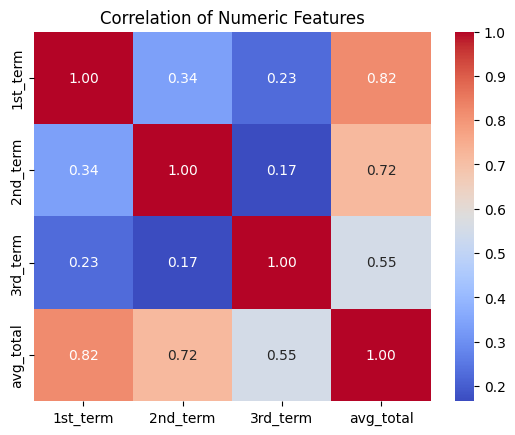

In [14]:
sns.heatmap(data.corr(numeric_only=True),annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Numeric Features")
plt.show()


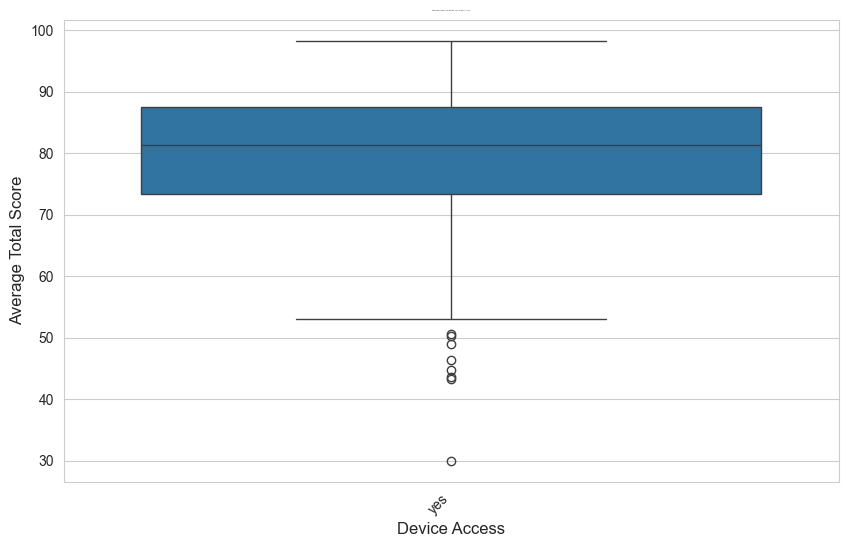

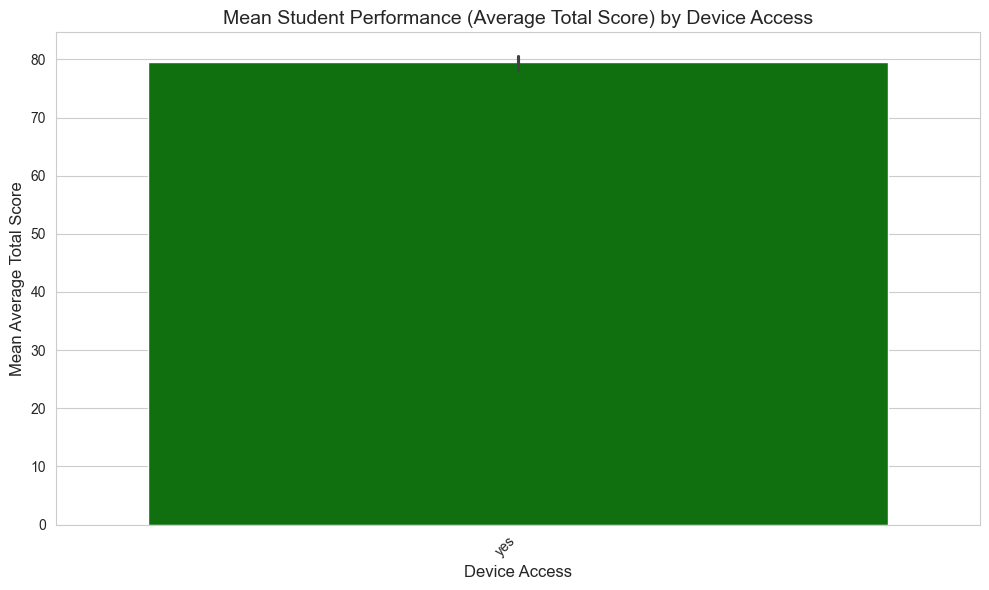

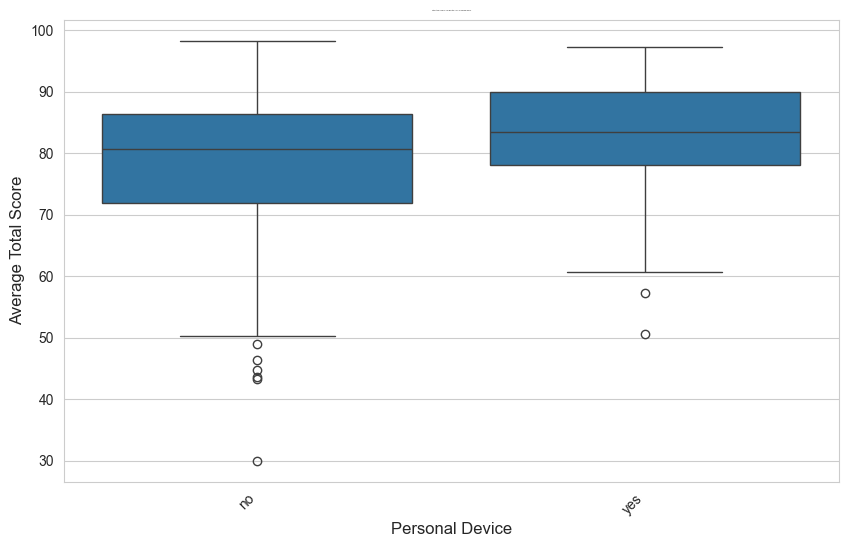

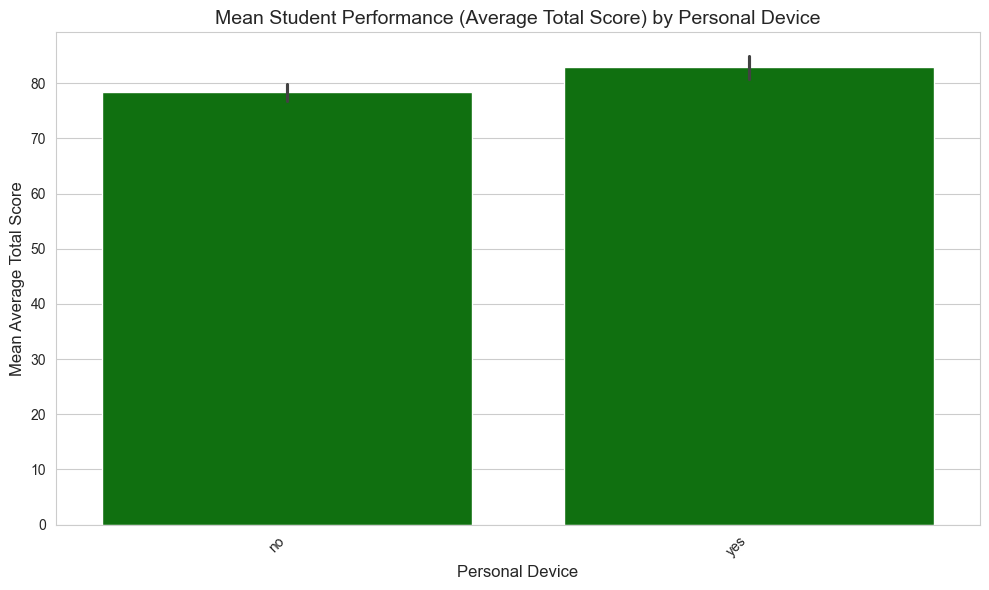

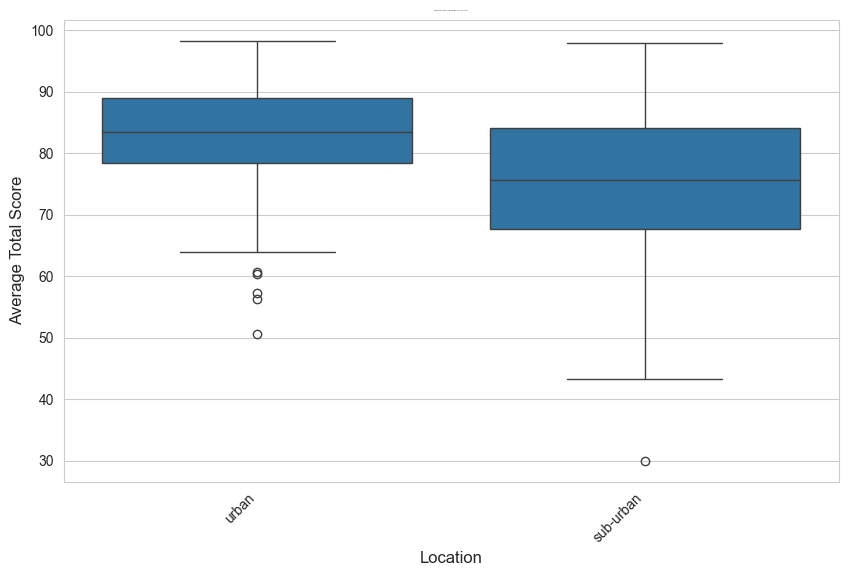

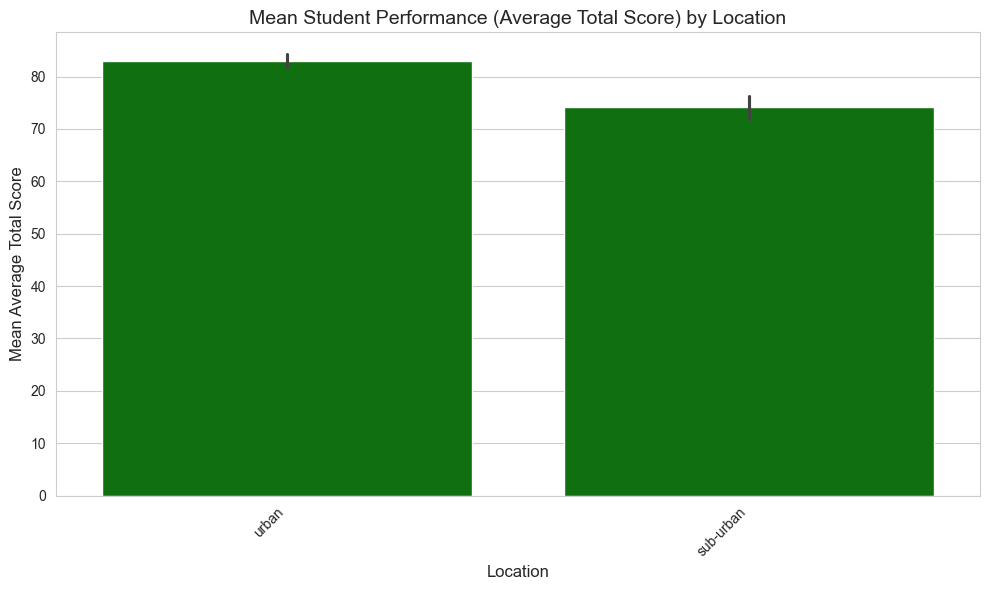

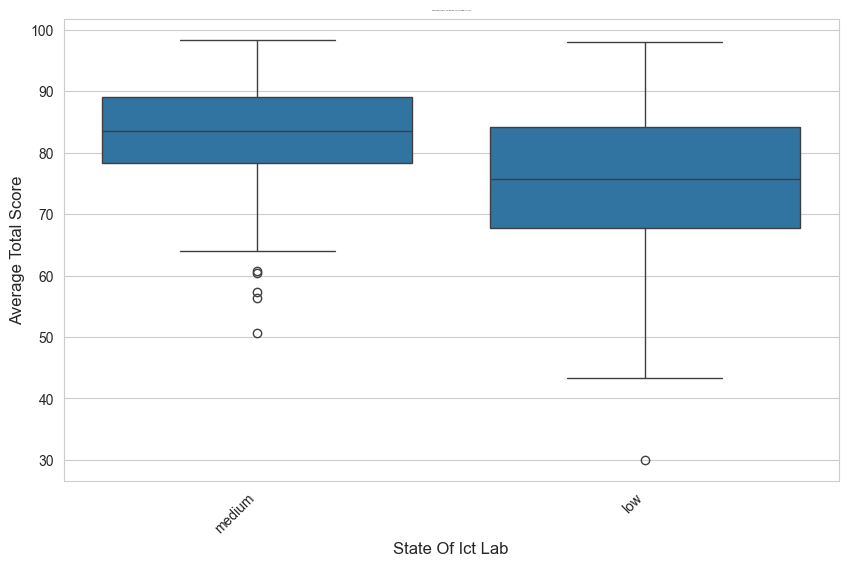

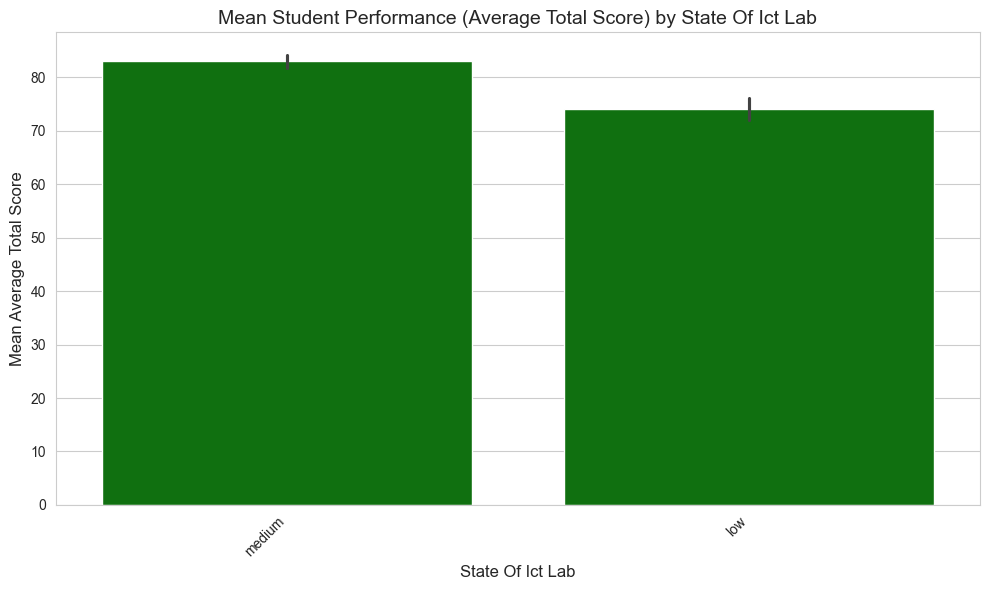

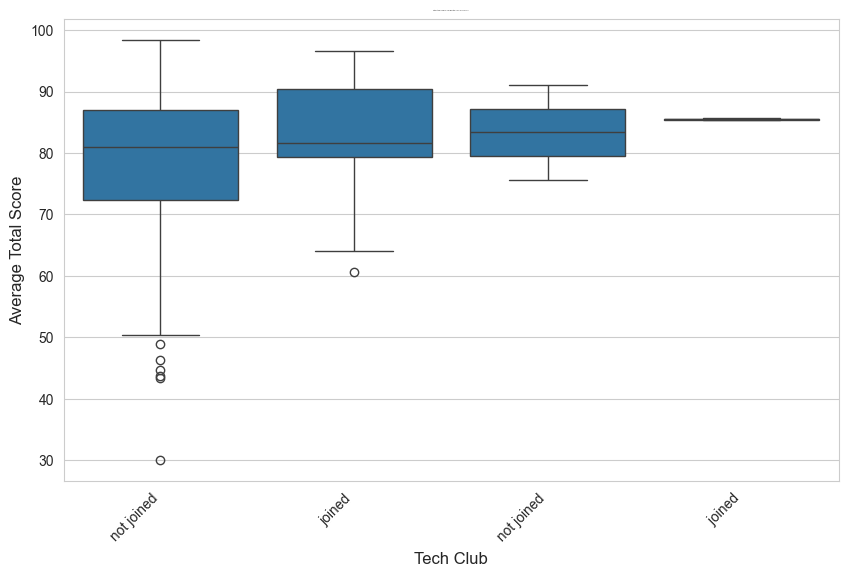

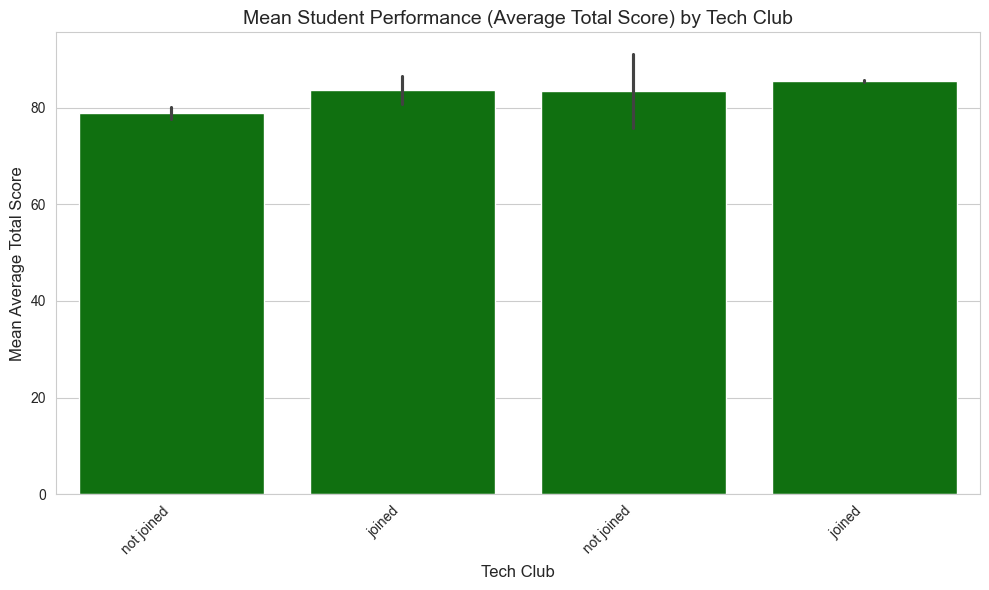

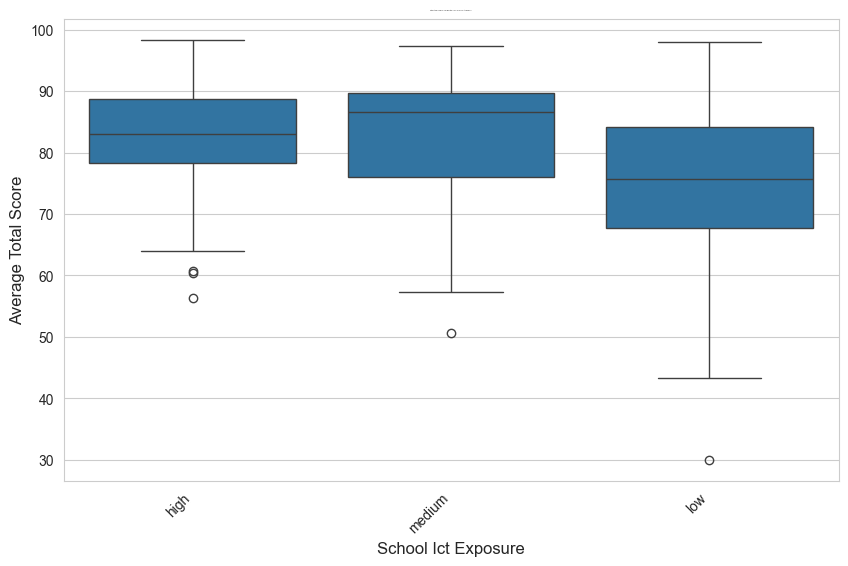

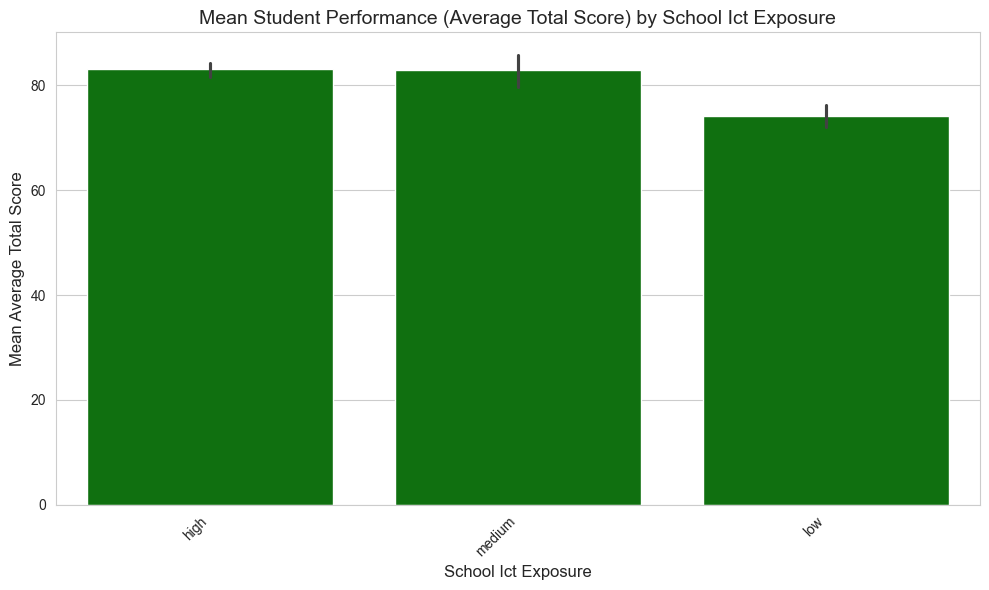

Box plots and bar plots saved for categorical variables.


In [15]:

# Define categorical variables for analysis
categorical_var = [
    'device_access',
    'personal_device',
    'location',
    'state_of_ict_lab',
    'tech_club',
    'school_ict_exposure'
]

# Set a consistent style for the plots
sns.set_style("whitegrid")

# Create visualizations for each categorical variable vs. avg_total
for col in categorical_var:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='avg_total', data=data)
    plt.title(f'Student Performance (Average Total Score) by {col.replace("_", " ").title()}', fontsize=1)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Average Total Score', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    # plt.tight_layout()
    plt.savefig(f'{col}_boxplot.png')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='avg_total', data=data, estimator=np.mean, color='green')
    plt.title(f'Mean Student Performance (Average Total Score) by {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12,)
    plt.ylabel('Mean Average Total Score', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{col}_barplot.png')

    plt.show()
print("Box plots and bar plots saved for categorical variables.")

In [16]:
# sns.heatmap(data.corr(),annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation of Numeric Features")
# plt.show()

In [17]:
#  Identify Improved Students
data['term_improvement'] = data['3rd_term'] - data['1st_term']
data['overall_improvement'] = data['avg_total'] - data['1st_term']

data['is_improved_term'] = (data['term_improvement'] > 0).astype(int)
data['is_improved_overall'] = (data['overall_improvement'] >= 5).astype(int)

print("Improved Students:")
print(f"- Students with 3rd Term score > 1st Term score: {data['is_improved_term'].sum()}")
print(f"- Students with Avg Total score >= 1st Term score + 5: {data['is_improved_overall'].sum()}")


Improved Students:
- Students with 3rd Term score > 1st Term score: 198
- Students with Avg Total score >= 1st Term score + 5: 125


At-Risk Students (Avg Total <= 73.42):
- Number of At-Risk Students: 82


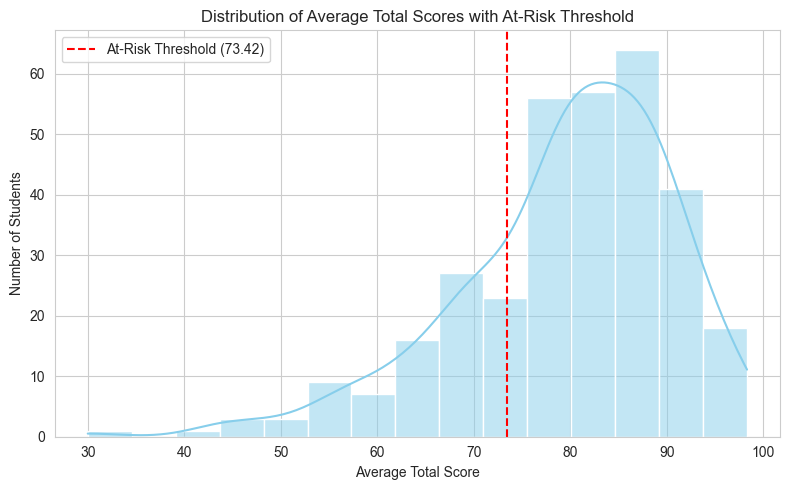

Sample of At-Risk Students and their attributes:
      student_id  avg_total device_access personal_device lab_access  \
11  sch01-stud12  72.333333           yes              no       high   
23  sch01-stud24  70.333333           yes              no       high   
39  sch01-stud40  72.666667           yes              no       high   
53  sch01-stud54  64.333333           yes              no       high   
57  sch01-stud58  69.000000           yes              no       high   

   school_ict_exposure state_of_ict_lab location  
11                high           medium    urban  
23                high           medium    urban  
39                high           medium    urban  
53                high           medium    urban  
57                high           medium    urban  
Distribution of Categorical Factors for At-Risk Students:

**Device Access distribution for At-Risk Students:**
device_access
yes    1.0
Name: proportion, dtype: float64

**Personal Device distribution for At-Ris

In [19]:
#  Identify At-Risk Students

# Allow threshold to be easily changed (e.g., 25th percentile or custom value)
at_risk_threshold = data['avg_total'].quantile(0.25)  # You can change 0.25 to another value if needed

data['is_at_risk'] = (data['avg_total'] <= at_risk_threshold).astype(int)

print(f"At-Risk Students (Avg Total <= {at_risk_threshold:.2f}):")
print(f"- Number of At-Risk Students: {data['is_at_risk'].sum()}")

# Visualize the threshold on a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['avg_total'], bins=15, kde=True, color='skyblue')
plt.axvline(at_risk_threshold, color='red', linestyle='--', label=f'At-Risk Threshold ({at_risk_threshold:.2f})')
plt.title('Distribution of Average Total Scores with At-Risk Threshold')
plt.xlabel('Average Total Score')
plt.ylabel('Number of Students')
plt.legend()
plt.tight_layout()
plt.show()

print("Sample of At-Risk Students and their attributes:")
at_risk_students_sample = data[data['is_at_risk'] == 1][
    ['student_id', 'avg_total', 'device_access', 'personal_device',
     'lab_access', 'school_ict_exposure', 'state_of_ict_lab', 'location']
].head()
print(at_risk_students_sample)

print("Distribution of Categorical Factors for At-Risk Students:")
at_risk_data = data[data['is_at_risk'] == 1]
for col in categorical_var:
    print(f"\n**{col.replace('_', ' ').title()} distribution for At-Risk Students:**")
    print(at_risk_data[col].value_counts(normalize=True))

# # Compare at-risk vs not-at-risk for a key variable (optional enhancement)
# print("Comparison of Digital Readiness Score (At-Risk vs Not-At-Risk):")
# sns.boxplot(x='is_at_risk', y='digital_readiness_score', data=data)
# plt.title('Digital Readiness Score by At-Risk Status')
# plt.xlabel('At Risk (0=No, 1=Yes)')
# plt.ylabel('Digital Readiness Score')
# plt.xticks([0, 1], ['Not At Risk', 'At Risk'])
# plt.tight_layout()
# plt.show()


In [20]:
# Calculate Digital Readiness Score with robust mapping and cleaning

digital_readiness_mapping = {
    'device_access': {'yes': 1, 'no': 0},
    'personal_device': {'yes': 1, 'no': 0},
    'lab_access': {'high': 3, 'medium': 2, 'low': 1, 'no': 0},
    'school_ict_exposure': {'high': 3, 'medium': 2, 'low': 1, 'no': 0},
    'state_of_ict_lab': {'excellent': 4, 'good': 3, 'medium': 2, 'fair': 1, 'poor': 0, 'low': 0, 'none': 0}
}

data['digital_readiness_score'] = 0

for col, mapping in digital_readiness_mapping.items():
    # Clean the column to avoid mapping errors due to case/whitespace
    data[col] = data[col].astype(str).str.lower().str.strip()
    data[f'{col}_numeric'] = data[col].map(mapping).fillna(0)
    data['digital_readiness_score'] += data[f'{col}_numeric']

print("Sample of Digital Readiness Scores:")
print(data[['student_id', 'digital_readiness_score', 'avg_total']].head())

Sample of Digital Readiness Scores:
     student_id  digital_readiness_score  avg_total
0  sch01-stud01                        9  81.666667
1  sch01-stud02                        9  86.666667
2  sch01-stud03                       10  89.000000
3  sch01-stud04                        9  79.666667
4  sch01-stud05                       10  79.666667


Visualizing Digital Readiness (Plots saved as PNGs)


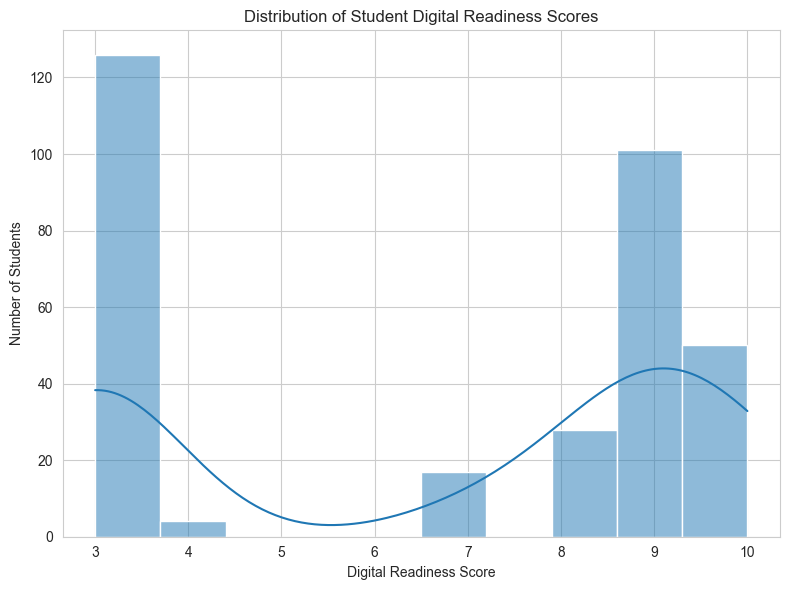

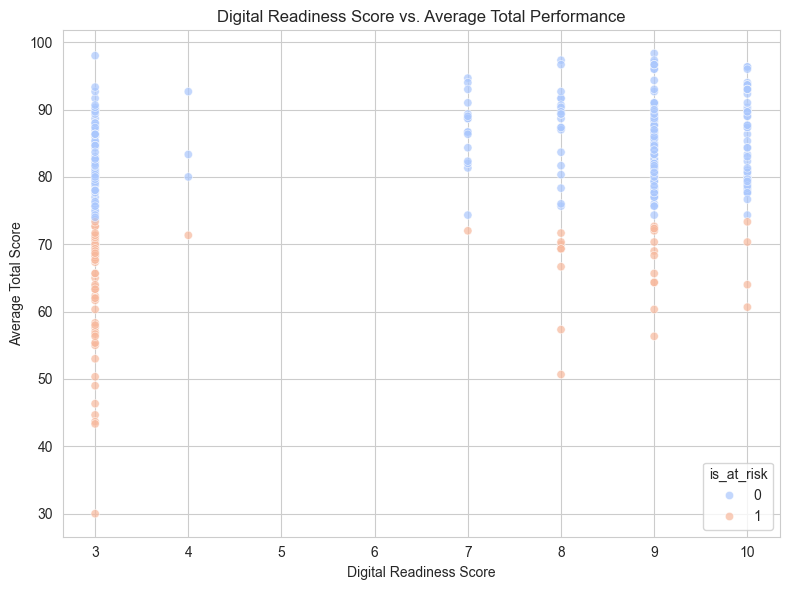

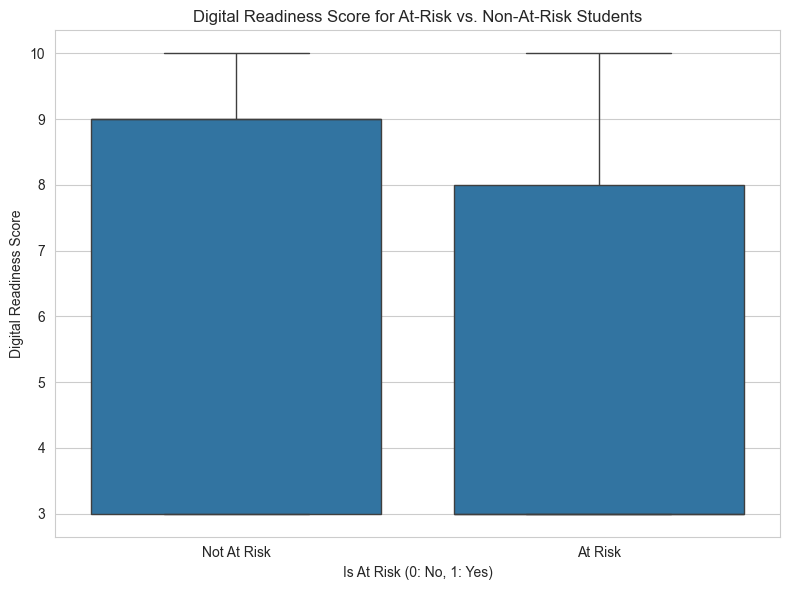

In [21]:
# Visualize Digital Readiness
print("Visualizing Digital Readiness (Plots saved as PNGs)")
plt.figure(figsize=(8, 6))
sns.histplot(data['digital_readiness_score'], kde=True, bins=10)
plt.title('Distribution of Student Digital Readiness Scores')
plt.xlabel('Digital Readiness Score')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='digital_readiness_score', y='avg_total', data=data, hue='is_at_risk', palette='coolwarm', alpha=0.7)
plt.title('Digital Readiness Score vs. Average Total Performance')
plt.xlabel('Digital Readiness Score')
plt.ylabel('Average Total Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_at_risk', y='digital_readiness_score', data=data)
plt.title('Digital Readiness Score for At-Risk vs. Non-At-Risk Students')
plt.xlabel('Is At Risk (0: No, 1: Yes)')
plt.ylabel('Digital Readiness Score')
plt.xticks(ticks=[0, 1], labels=['Not At Risk', 'At Risk'])
plt.tight_layout()
plt.show()

#### Feature Engineering

In [22]:
# Identify categorical columns that need encoding for the model
categorical_cols_to_encode = [
    'school', 'level', 'subject', 'device_access', 'tech_club',
    'personal_device', 'lab_access', 'school_ict_exposure', 'location',
    'state_of_ict_lab'
]
#  Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols_to_encode, drop_first=True)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   326 non-null    object 
 1   1st_term                     326 non-null    int64  
 2   2nd_term                     326 non-null    int64  
 3   3rd_term                     326 non-null    int64  
 4   avg_total                    326 non-null    float64
 5   term_improvement             326 non-null    int64  
 6   overall_improvement          326 non-null    float64
 7   is_improved_term             326 non-null    int64  
 8   is_improved_overall          326 non-null    int64  
 9   is_at_risk                   326 non-null    int64  
 10  digital_readiness_score      326 non-null    int64  
 11  device_access_numeric        326 non-null    int64  
 12  personal_device_numeric      326 non-null    int64  
 13  lab_access_numeric  

In [23]:
# data.rename(columns={'computer_access': 'device_access'}, inplace=True)
data_encoded.rename(columns={'computer_access': 'device_access'},inplace=True)
data_encoded

,student_id,1st_term,2nd_term,3rd_term,avg_total,term_improvement,overall_improvement,is_improved_term,is_improved_overall,is_at_risk,...,tech_club_ not joined,tech_club_joined,tech_club_not joined,personal_device_yes,lab_access_low,lab_access_medium,school_ict_exposure_low,school_ict_exposure_medium,location_urban,state_of_ict_lab_medium
0,sch01-stud01,77,79,89,81.666667,12,4.666667,1,0,0,...,False,False,True,False,False,False,False,False,True,True
1,sch01-stud02,82,100,78,86.666667,-4,4.666667,0,0,0,...,False,False,True,False,False,False,False,False,True,True
2,sch01-stud03,85,97,85,89.000000,0,4.000000,0,0,0,...,False,True,False,True,False,False,False,False,True,True
3,sch01-stud04,70,90,79,79.666667,9,9.666667,1,1,0,...,False,False,True,False,False,False,False,False,True,True
4,sch01-stud05,87,83,69,79.666667,-18,-7.333333,0,0,0,...,False,True,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,sch03-stud126,83,41,82,68.666667,-1,-14.333333,0,0,1,...,False,False,True,False,True,False,True,False,False,False
322,sch03-stud127,60,70,90,73.333333,30,13.333333,1,1,1,...,False,False,True,False,True,False,True,False,False,False
323,sch03-stud128,57,87,78,74.000000,21,17.000000,1,1,0,...,False,False,True,False,True,False,True,False,False,False
324,sch03-stud129,66,70,78,71.333333,12,5.333333,1,1,1,...,False,False,True,True,True,False,True,False,False,False


In [26]:
data_encoded['avg_total']

0      81.666667
1      86.666667
2      89.000000
3      79.666667
4      79.666667
         ...    
321    68.666667
322    73.333333
323    74.000000
324    71.333333
325    63.333333
Name: avg_total, Length: 326, dtype: float64

In [29]:
# Define features (X) and target (y)
X = data_encoded.drop(columns=[
    'student_id', '1st_term', '2nd_term', '3rd_term', 'avg_total',
    'term_improvement', 'overall_improvement', 'is_improved_term',
    'is_improved_overall', 'is_at_risk',
    'device_access_numeric', 'personal_device_numeric', 'lab_access_numeric',
    'school_ict_exposure_numeric', 'state_of_ict_lab_numeric'
])
y = data_encoded['avg_total']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("### Sample of engineered features (first 5 rows):")
X.head()

Shape of features (X): (326, 24)
Shape of target (y): (326,)
### Sample of engineered features (first 5 rows):


,digital_readiness_score,school_sch02,school_sch03,level_JS2,level_JS3,level_SS1,level_SS2,level_primary 1,level_primary 2,level_primary 3,...,tech_club_ not joined,tech_club_joined,tech_club_not joined,personal_device_yes,lab_access_low,lab_access_medium,school_ict_exposure_low,school_ict_exposure_medium,location_urban,state_of_ict_lab_medium
0,9,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,True
1,9,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,True
2,10,False,False,False,False,False,False,False,False,True,...,False,True,False,True,False,False,False,False,True,True
3,9,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,True
4,10,False,False,False,False,False,False,False,False,True,...,False,True,False,True,False,False,False,False,True,True


#### Model Selection and Training

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 260 samples
Testing set size: 66 samples


In [31]:
#  Model Comparison
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

results_data = pd.DataFrame(results).T
print("Model Comparison:")
display(results_data)

Model Comparison:


,MAE,RMSE,R2
Random Forest,7.059401,8.799468,0.259609
Linear Regression,6.883414,8.693797,0.277285
Gradient Boosting,6.912151,8.705227,0.275383


In [ ]:
# Fine tuning the model using hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "Linear Regression": {},  # No hyperparameters to tune
    "Gradient Boosting": {
        'n_estimators': [100, 150],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
}

tuned_results = {}

for name, mdl in models.items():
    if param_grids[name]:  # Apply tuning only if grid is not empty
        grid_search = GridSearchCV(mdl, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = mdl
        best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    tuned_results[name] = {
        "Best Params": grid_search.best_params_ if param_grids[name] else "Default",
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

tuned_results_data = pd.DataFrame(tuned_results).T
print("Model Comparison after Hyperparameter Tuning:")
display(tuned_results_data)

Model Comparison after Hyperparameter Tuning:


,Best Params,MAE,RMSE,R2
Random Forest,"{'max_depth': None, 'min_samples_split': 5, 'n...",7.04197,8.794696,0.260412
Linear Regression,Default,6.883414,8.693797,0.277285
Gradient Boosting,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",6.813795,8.622194,0.289141


In [33]:



# Define Models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# 🔍 Define hyperparameter grids
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "Linear Regression": {},  # No hyperparameters to tune
    "Gradient Boosting": {
        'n_estimators': [100, 150],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
}

#  Perform tuning and evaluation
tuned_results = {}

for name in models:
    model = models[name]
    params = param_grids[name]

    if params:
        grid_search = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_model = model
        best_model.fit(X_train, y_train)
        best_params = "Default"

    y_pred = best_model.predict(X_test)

    tuned_results[name] = {
        "model": best_model,
        "params": best_params,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

# # 📊 Format results for display
# summary_df = pd.DataFrame({
#     name: {
#         "Params": result["params"],
#         "MAE": result["MAE"],
#         "RMSE": result["RMSE"],
#         "R2": result["R2"]
#     } for name, result in tuned_results.items()
# }).T


tuned_results_data = pd.DataFrame(tuned_results).T
# print("Model Comparison after Hyperparameter Tuning:")
# display(tuned_results_data)

print("🔍 Model Comparison after Hyperparameter Tuning:")
tuned_results_data.sort_values(by = 'RMSE')

🔍 Model Comparison after Hyperparameter Tuning:


,model,params,MAE,RMSE,R2
Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",6.813795,8.622194,0.289141
Linear Regression,LinearRegression(),Default,6.883414,8.693797,0.277285
Random Forest,"(DecisionTreeRegressor(max_features=1.0, min_s...","{'max_depth': None, 'min_samples_split': 5, 'n...",7.04197,8.794696,0.260412


In [34]:
best_model


,loss,'squared_error'
,learning_rate,0.05
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [35]:
# Rename columns to indicate whether they are before or after tuning

before_tuning = results_data.rename(columns={
    "MAE": "MAE (Before)",
    "RMSE": "RMSE (Before)",
    "R2": "R2 (Before)"
})

after_tuning = tuned_results_data[["MAE", "RMSE", "R2"]].rename(columns={
    "MAE": "MAE (After)",
    "RMSE": "RMSE (After)",
    "R2": "R2 (After)"
})

# Merge the two DataFrames for comparison
comparison_data = before_tuning.join(after_tuning)
print("Model performance Comparison Before and After Hyperparameter")
display(comparison_data)

Model performance Comparison Before and After Hyperparameter


,MAE (Before),RMSE (Before),R2 (Before),MAE (After),RMSE (After),R2 (After)
Random Forest,7.059401,8.799468,0.259609,7.04197,8.794696,0.260412
Linear Regression,6.883414,8.693797,0.277285,6.883414,8.693797,0.277285
Gradient Boosting,6.912151,8.705227,0.275383,6.813795,8.622194,0.289141


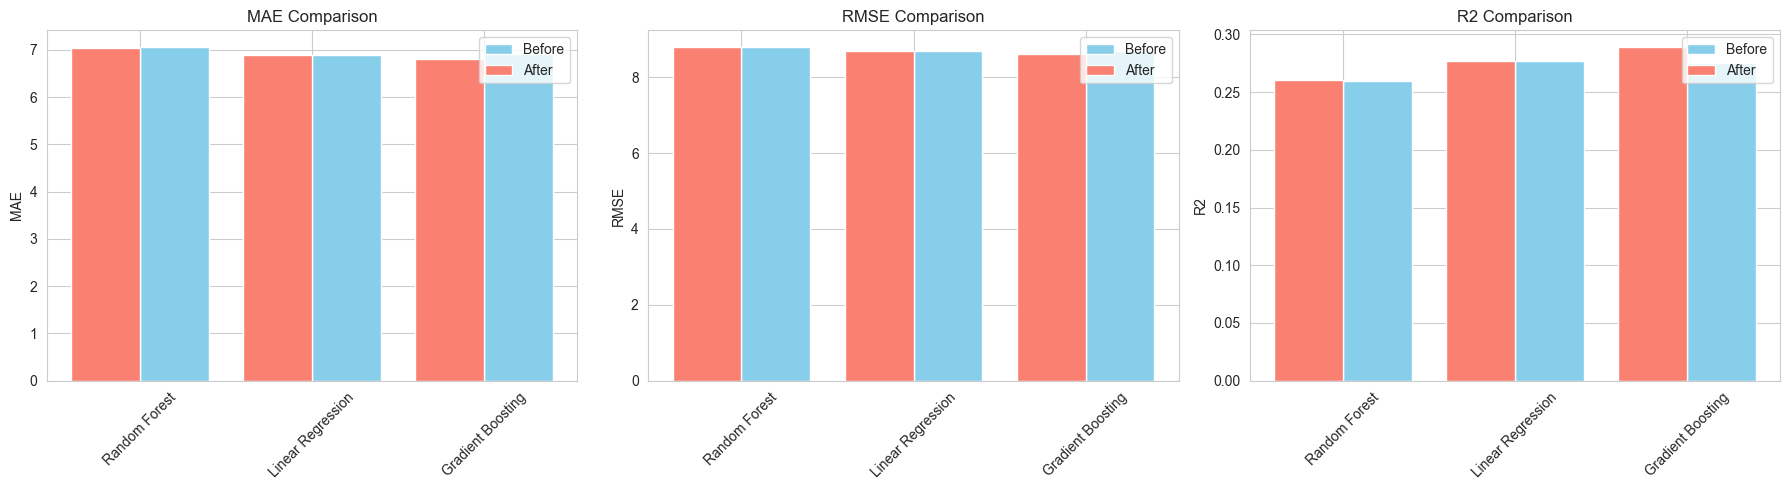

In [36]:
import matplotlib.pyplot as plt

# Set up the figure
metrics = ['MAE', 'RMSE', 'R2']
x = comparison_data.index #model names

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
colors = ['skyblue', 'salmon']

for i, metric in enumerate(metrics):
    ax[i].bar(x, comparison_data[f"{metric} (Before)"], width=0.4, label='Before', align='edge', color=colors[0])
    ax[i].bar(x, comparison_data[f"{metric} (After)"], width=-0.4, label='After', align='edge', color=colors[1])

    ax[i].set_title(f"{metric} Comparison")
    ax[i].set_ylabel(metric)
    ax[i].legend()
    ax[i].set_xticklabels(x, rotation=45)

plt.tight_layout()
plt.show()

In [37]:
best_model = comparison_data["R2 (After)"].idxmax()
print(f" Best model after hyperparameter tuning: {best_model}")



 Best model after hyperparameter tuning: Gradient Boosting


In [44]:
best_row = tuned_results_data.sort_values(by='RMSE').iloc[0]
best_row

model     ([DecisionTreeRegressor(criterion='friedman_ms...
params    {'learning_rate': 0.05, 'max_depth': 3, 'n_est...
MAE                                                6.813795
RMSE                                               8.622194
R2                                                 0.289141
Name: Gradient Boosting, dtype: object

In [39]:
best_gb_model = best_row['model']
best_gb_model

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [53]:
final_model = best_gb_model

In [54]:
final_model.fit(X,y)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [55]:
final_model.predict(X_test)

array([80.58851847, 83.47689758, 72.70429973, 85.21502488, 72.73628343,
       74.51077411, 72.70429973, 74.51077411, 74.51077411, 74.27716764,
       81.05549933, 72.70429973, 72.40056249, 84.0480643 , 72.40056249,
       90.13077778, 83.47689758, 84.58607507, 85.21502488, 85.21502488,
       84.11414439, 81.05549933, 84.11414439, 72.70429973, 72.73628343,
       72.70429973, 83.47689758, 84.58607507, 82.81885026, 72.70429973,
       72.40056249, 74.51077411, 72.70429973, 81.05549933, 72.40056249,
       80.44511205, 83.35020654, 85.21502488, 88.24805384, 88.49686028,
       80.58851847, 85.21502488, 84.7712603 , 80.44511205, 88.04594718,
       72.40056249, 82.24768354, 72.70429973, 82.24768354, 85.21502488,
       83.92895916, 82.81885026, 85.21502488, 83.92895916, 82.24768354,
       72.70429973, 72.70429973, 81.05549933, 85.21502488, 82.24768354,
       72.40056249, 80.58851847, 84.11414439, 84.58607507, 74.51077411,
       80.44511205])

In [56]:
# Exporting the final model
joblib.dump(final_model, "best_model.pkl")

['best_model.pkl']

In [57]:
# check for the file
joblib.load('best_model.pkl').predict(X_test)

array([80.58851847, 83.47689758, 72.70429973, 85.21502488, 72.73628343,
       74.51077411, 72.70429973, 74.51077411, 74.51077411, 74.27716764,
       81.05549933, 72.70429973, 72.40056249, 84.0480643 , 72.40056249,
       90.13077778, 83.47689758, 84.58607507, 85.21502488, 85.21502488,
       84.11414439, 81.05549933, 84.11414439, 72.70429973, 72.73628343,
       72.70429973, 83.47689758, 84.58607507, 82.81885026, 72.70429973,
       72.40056249, 74.51077411, 72.70429973, 81.05549933, 72.40056249,
       80.44511205, 83.35020654, 85.21502488, 88.24805384, 88.49686028,
       80.58851847, 85.21502488, 84.7712603 , 80.44511205, 88.04594718,
       72.40056249, 82.24768354, 72.70429973, 82.24768354, 85.21502488,
       83.92895916, 82.81885026, 85.21502488, 83.92895916, 82.24768354,
       72.70429973, 72.70429973, 81.05549933, 85.21502488, 82.24768354,
       72.40056249, 80.58851847, 84.11414439, 84.58607507, 74.51077411,
       80.44511205])


### Top 10 Feature Importances (from best model):
digital_readiness_score    0.524891
level_primary 5            0.186580
level_SS2                  0.075967
level_primary 2            0.043621
level_primary 1            0.040026
level_primary 4            0.029788
subject_ict                0.016858
personal_device_yes        0.016453
location_urban             0.013060
level_primary 3            0.011610
dtype: float64

Tuned RandomForestRegressor model saved as 'best_model.pkl'
Model features list saved as 'model_features.pkl'
Categorical options and digital readiness mapping saved for Streamlit app.

--- ML Pipeline Execution Complete. ---
You can now run the Streamlit app by saving the next code block as 'app.py' and running: 'streamlit run app.py'


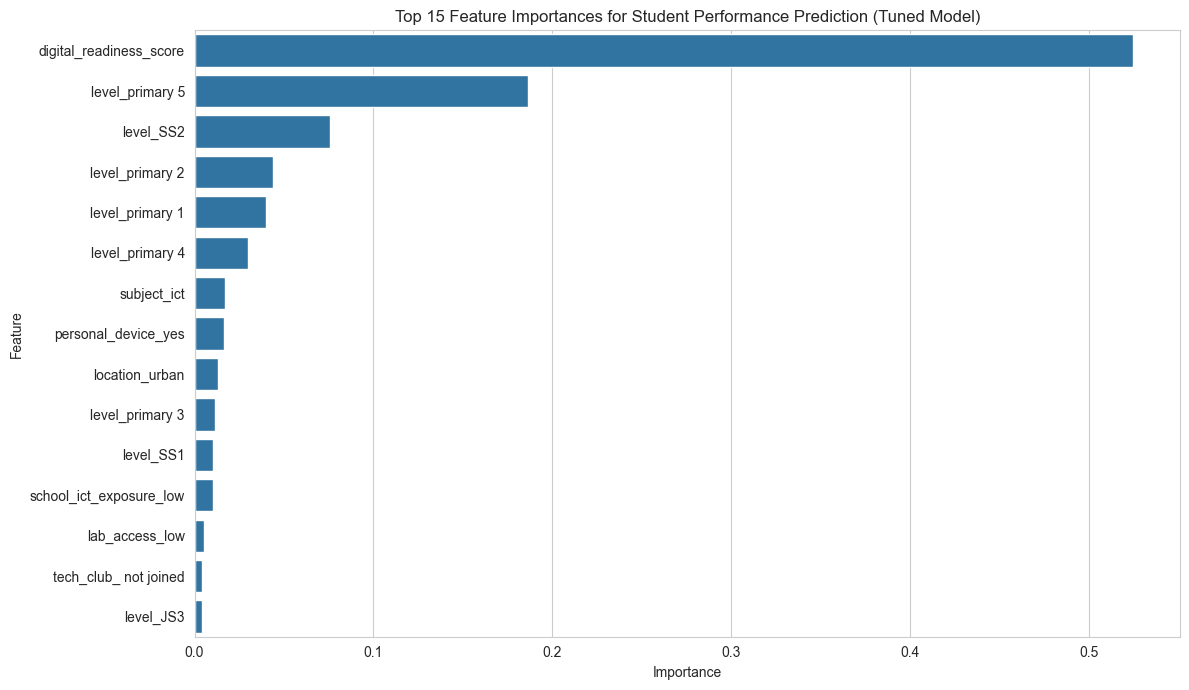

In [58]:
# Feature Importance from the best model
# feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
# feature_importances_sorted = feature_importances.sort_values(ascending=False)
feature_importances = pd.Series(final_model.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print("\n### Top 10 Feature Importances (from best model):")
print(feature_importances_sorted.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances_sorted.head(15).values, y=feature_importances_sorted.head(15).index)
plt.title('Top 15 Feature Importances for Student Performance Prediction (Tuned Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
# plt.savefig(os.path.join(output_dir, 'feature_importances_tuned.png')) # Save as a new file for clarity
# plt.close()

# Save the best trained model and features for deployment
# joblib.dump(best_model,'random_forest_model.pkl') # Overwrite with the best model
# joblib.dump(X.columns.tolist(), 'model_features.pkl')
joblib.dump(final_model, 'best_model.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')
print("\nTuned RandomForestRegressor model saved as 'best_model.pkl'")
print("Model features list saved as 'model_features.pkl'")

# Save categorical options and digital readiness mapping for Streamlit app
df_original_for_options = pd.read_csv('student_data2.csv')
categorical_cols_for_input = {
    'school': df_original_for_options['school'].unique().tolist(),
    'level': df_original_for_options['level'].dropna().unique().tolist(),
    'subject': df_original_for_options['subject'].unique().tolist(),
    'device_access': df_original_for_options['device_access'].unique().tolist(),
    'tech_club': df_original_for_options['tech_club'].unique().tolist(),
    'personal_device': df_original_for_options['personal_device'].unique().tolist(),
    'lab_access': df_original_for_options['lab_access'].unique().tolist(),
    'school_ict_exposure': df_original_for_options['school_ict_exposure'].unique().tolist(),
    'location': df_original_for_options['location'].unique().tolist(),
    'state_of_ict_lab': df_original_for_options['state_of_ict_lab'].unique().tolist()
}
joblib.dump(categorical_cols_for_input,'categorical_options.pkl')
joblib.dump(digital_readiness_mapping,'digital_readiness_mapping.pkl')
print("Categorical options and digital readiness mapping saved for Streamlit app.")

print("\n--- ML Pipeline Execution Complete. ---")
print("You can now run the Streamlit app by saving the next code block as 'app.py' and running: 'streamlit run app.py'")


In [60]:
joblib.load('model_features.pkl')

['digital_readiness_score',
 'school_sch02',
 'school_sch03',
 'level_JS2',
 'level_JS3',
 'level_SS1',
 'level_SS2',
 'level_primary 1',
 'level_primary 2',
 'level_primary 3',
 'level_primary 4',
 'level_primary 5',
 'level_primary 6',
 'subject_ict',
 'tech_club_ not joined',
 'tech_club_joined',
 'tech_club_not joined',
 'personal_device_yes',
 'lab_access_low',
 'lab_access_medium',
 'school_ict_exposure_low',
 'school_ict_exposure_medium',
 'location_urban',
 'state_of_ict_lab_medium']